# VMEC Python Interface
This notebook introduces the user to the VMEC Python interface.  This is accomplished by using the CTYPES Python library interface to directly access a statically linked version of libstell as compiled with the VMEC distribution.

First we Test if we can load the library.

In [3]:
from libstell import *

Now we test reading a file.

In [4]:
from libstell import *                #Import the LIBSTELL Library
from matplotlib.pyplot import *       #Import matplotlib.pyplot for plotting
from math import *                    #For some constants
import numpy as np                    #For Arrays
# Now use LIBSTELL to read a wout file.
v=libstell.read_vmec('../BENCHMARKS/wout_QAS.nc')

In [8]:
# We now Fourier transform the data into points in real space on an [ns,nu,nv] grid
nu=32
nv=15*v['nfp']
ns=v['ns']
theta = np.ndarray((nu,1))
zeta = np.ndarray((nv,1))
for i in range(nu): theta[i]=2*pi*i/(nu-1)
for i in range(nv): zeta[i]=2*pi*i/(nv-1)
r=libstell.cfunct(theta,zeta,v['rmnc'],v['xm'],v['xn'])
z=libstell.sfunct(theta,zeta,v['zmns'],v['xm'],v['xn'])
b=libstell.cfunct(theta,zeta,v['bmnc'],v['xm'],v['xn'])
g=libstell.cfunct(theta,zeta,v['gmnc'],v['xm'],v['xn'])
currv=libstell.cfunct(theta,zeta,v['currvmnc'],v['xm'],v['xn'])

<class 'int'>


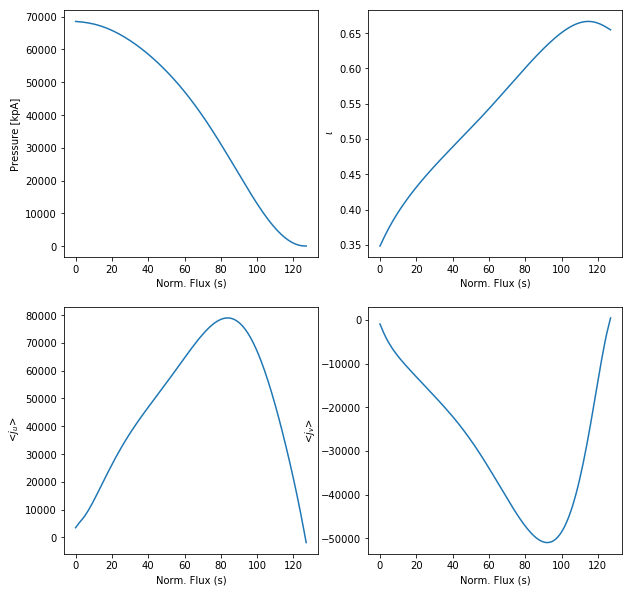

In [6]:
# This section shows how to plot various 1D quantities. We did not need to Fourier transform to plot these.
fig = figure(figsize=(10,10))
ax1 = fig.add_subplot(2,2,1, adjustable='box', xlabel='Norm. Flux (s)',ylabel='Pressure [kpA]')
ax1.plot(v['presf'])
ax2 = fig.add_subplot(2,2,2, adjustable='box', xlabel='Norm. Flux (s)',ylabel=' $\iota$')
ax2.plot(v['iotaf'])
ax3 = fig.add_subplot(2,2,3, adjustable='box', xlabel='Norm. Flux (s)',ylabel=' <$j_u$>')
ax3.plot(v['jcuru'])
ax4 = fig.add_subplot(2,2,4, adjustable='box', xlabel='Norm. Flux (s)',ylabel='<$j_v$>')
ax4.plot(v['jcurv'])
show()

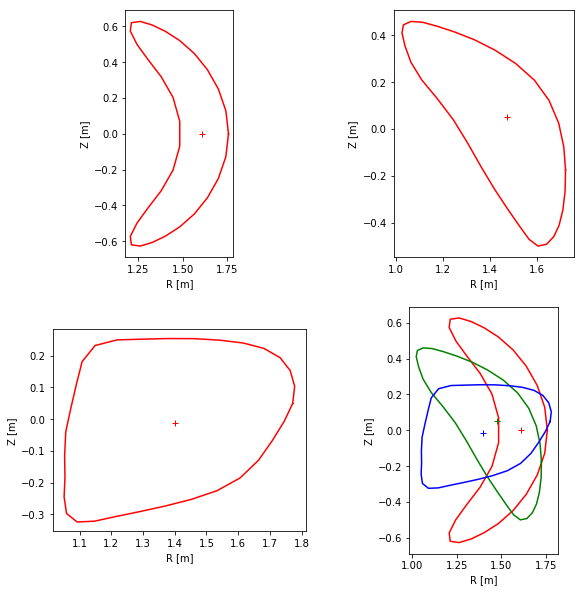

In [10]:
# Now let's make some plots of the flux surfaces of the equilibrium in three cross sections
fig = figure(figsize=(10,10))
ax1 = fig.add_subplot(2,2,1, adjustable='box', xlabel='R [m]',ylabel='Z [m]',aspect='equal')
ax1.plot(r[ns-1,:,0],z[ns-1,:,0],color='red')
ax1.plot(r[0,0,0],z[0,0,0],'+',color='red')
ax2 = fig.add_subplot(2,2,2, adjustable='box', xlabel='R [m]',ylabel='Z [m]',aspect='equal')
dex = round(nv/(4*v['nfp']))
ax2.plot(r[ns-1,:,dex],z[ns-1,:,dex],color='red')
ax2.plot(r[0,0,dex],z[0,0,dex],'+',color='red')
ax3 = fig.add_subplot(2,2,3, adjustable='box', xlabel='R [m]',ylabel='Z [m]',aspect='equal')
dex = round(nv/(2*v['nfp'])) # Note it helps is nv is odd
ax3.plot(r[ns-1,:,dex],z[ns-1,:,dex],color='red')
ax3.plot(r[0,0,dex],z[0,0,dex],'+',color='red')
ax2 = fig.add_subplot(2,2,4, adjustable='box', xlabel='R [m]',ylabel='Z [m]',aspect='equal')
dex = 0 # Note it helps is nv is odd
ax2.plot(r[ns-1,:,dex],z[ns-1,:,dex],color='red')
ax2.plot(r[0,0,dex],z[0,0,dex],'+',color='red')
dex = round(nv/(4*v['nfp'])) # Note it helps is nv is odd
ax2.plot(r[ns-1,:,dex],z[ns-1,:,dex],color='green')
ax2.plot(r[0,0,dex],z[0,0,dex],'+',color='green')
dex = round(nv/(2*v['nfp'])) # Note it helps is nv is odd
ax2.plot(r[ns-1,:,dex],z[ns-1,:,dex],color='blue')
ax2.plot(r[0,0,dex],z[0,0,dex],'+',color='blue')
show()

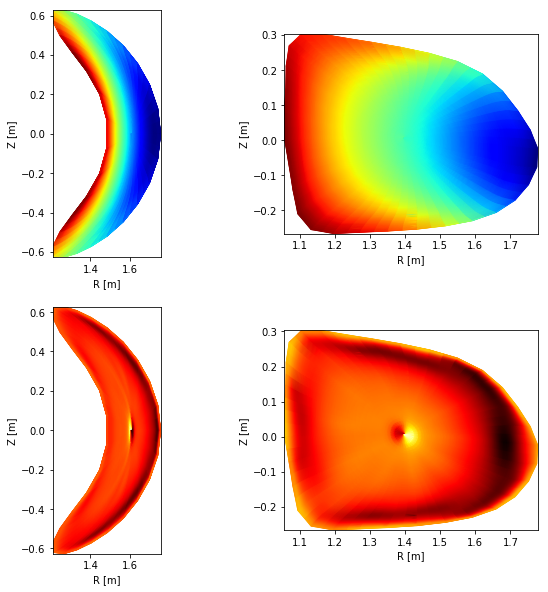

In [11]:
# Now we plot color cross sections of various quantities
fig = figure(figsize=(10,10))
ax1 = fig.add_subplot(2,2,1, adjustable='box', xlabel='R [m]',ylabel='Z [m]',aspect='equal')
ax1.pcolormesh(r[:,:,0],z[:,:,0],b[:,:,0],cmap='jet',shading='gouraud')
ax1 = fig.add_subplot(2,2,2, adjustable='box', xlabel='R [m]',ylabel='Z [m]',aspect='equal')
ax1.pcolormesh(r[:,:,int(nv/6)],z[:,:,int(nv/6)],b[:,:,int(nv/6)],cmap='jet',shading='gouraud')
ax1 = fig.add_subplot(2,2,3, adjustable='box', xlabel='R [m]',ylabel='Z [m]',aspect='equal')
ax1.pcolormesh(r[:,:,0],z[:,:,0],currv[:,:,0]/g[:,:,0],cmap='hot',shading='gouraud')
ax1 = fig.add_subplot(2,2,4, adjustable='box', xlabel='R [m]',ylabel='Z [m]',aspect='equal')
ax1.pcolormesh(r[:,:,int(nv/6)],z[:,:,int(nv/6)],currv[:,:,int(nv/6)]/g[:,:,int(nv/6)],cmap='hot',shading='gouraud')
show()
#help(cm)

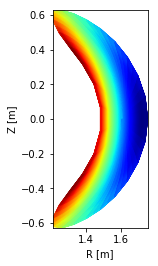

In [12]:
# Of course there is a much easier way to do this.
libstell.torocont(r,z,b,0)

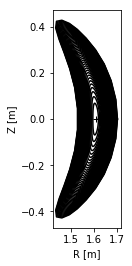

In [13]:
# Also this is much simpler way to plot cross sections as well
libstell.toroslice(r,0,z,range(0,49))

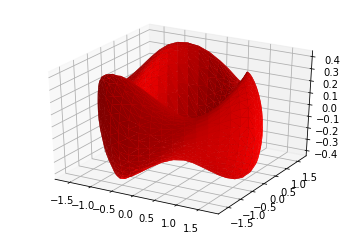

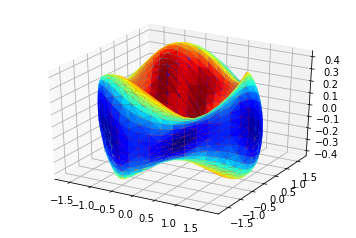

In [14]:
# There is also an easy way to to plot isosurfaces.
h=libstell.isotoro(r,z,zeta,[48])
h=libstell.isotoro(r,z,zeta,[48],b)

In [1]:
# Now we read the contents of a VMEC input file.
from libstell import *
iunit = 27
iunit2 = 28
istat = 0
recl  = 1
temp=libstell.safe_open(iunit,istat,'../BENCHMARKS/input.QAS','old','formatted',recl,'sequential','none')
test=libstell.read_indata_namelist(iunit,istat)
print(test['pmass_type'])
print(test['am'])
#temp=libstell.safe_open(iunit2,istat,'input.QAS_temp','unknown','formatted',recl,'sequential','none')
#libstell.write_indata_namelist(iunit2,istat,test)
#p=test['mgrid_file']
#test['niter_array'].shape
temp = libstell.pmass(0.2)
print(temp)

power_series        
[   68551.76493524    -5120.27745123   -36151.04517455  -474263.01411307
  1788781.9547387  -3215138.2886817   2690410.23837233  -817049.85416837
        0.                0.                0.                0.                0.
        0.                0.                0.                0.                0.
        0.                0.                0.        ]
0.08077976991304622


In [7]:
temp = libstell.pmass(0.5)
print(temp)
test='bobdole'
print(test[0:2])

0.05611041155639
bo


In [9]:
import os, sys
import ctypes as ct
libstell = ct.cdll.LoadLibrary(os.environ["STELLOPT_PATH"]+"/LIBSTELL/Release/libstell.so")
ftemp=ct.c_int
nfp = ftemp.in_dll(libstell,'__vmec_input_MOD_nfp')
nfpa = ct.c_int.from_buffer(nfp)
print(nfpa)
nfp = 4
print(nfpa)
nfp = ftemp.in_dll(libstell,'__vmec_input_MOD_nfp')

c_int(3)
c_int(3)


In [ ]:
nfp.contents